In [1]:
import networkx as nx

In [5]:
max([1,2,3,4,5])

5

In [6]:
max(['apple', 'grape', 'carrot'])

'grape'

In [7]:
max(['apple', 'grape', 'carrot'], key=len)

'carrot'

Graph with 143 nodes and 623 edges


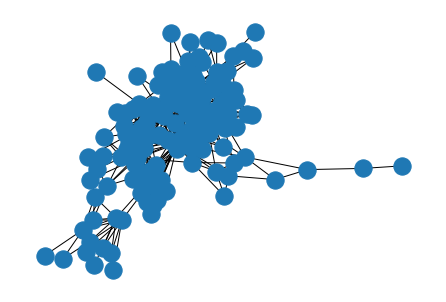

In [16]:
g = nx.read_edgelist('C:/Users/Microsoft/Desktop/Project django 1/ia-enron-only.edges', nodetype=int)
print(nx.info(g))
nx.draw(g)

In [17]:
highest_degree_node = max(g.nodes, key=g.degree)
highest_degree_node

105

In [18]:
g.degree(highest_degree_node)

42

In [19]:
betweenness = nx.centrality.betweenness_centrality(g)
highest_betweenness_node = max(g.nodes, key=betweenness.get)
highest_betweenness_node

105

In [20]:
betweenness[highest_betweenness_node]

0.19400604344556296

In [21]:
max(g.nodes, key=betweenness)

TypeError: 'dict' object is not callable

In [22]:
degree_sequence = [g.degree(n) for n in g.nodes]

In [23]:
import statistics
print('Mean degree:', statistics.mean(degree_sequence))
print('Median degree:', statistics.median(degree_sequence))

Mean degree: 8.713286713286713
Median degree: 8


In [25]:
betweenness = nx.centrality.betweenness_centrality(g)
betweenness_sequence = list(betweenness.values())
print('Mean betweenness:', statistics.mean(betweenness_sequence))
print('Median betweenness:', statistics.median(betweenness_sequence))

Mean betweenness: 0.013950388838012454
Median betweenness: 0.0037492834763570323


In [26]:
from collections import Counter
degree_counts = Counter(degree_sequence)
degree_counts

Counter({30: 1,
         2: 16,
         17: 5,
         12: 5,
         13: 3,
         16: 5,
         10: 9,
         11: 10,
         18: 3,
         20: 1,
         15: 3,
         19: 2,
         7: 9,
         14: 6,
         9: 16,
         42: 1,
         8: 6,
         5: 8,
         6: 7,
         1: 6,
         4: 11,
         23: 1,
         3: 9})

In [27]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plot_x = list(range(min_degree, max_degree + 1))

In [28]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]

<BarContainer object of 42 artists>

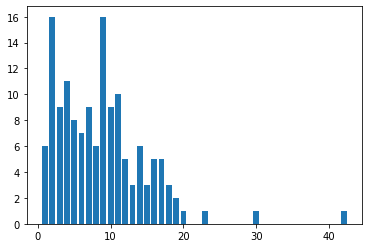

In [29]:
import matplotlib.pyplot as plt
plt.bar(plot_x, plot_y)

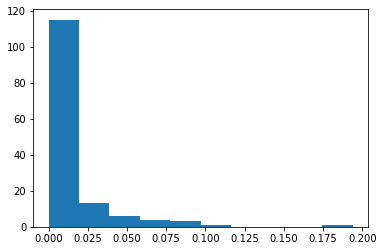

In [30]:
counts, bins, patches = plt.hist(betweenness_sequence, bins=10)

In [31]:
bins

array([0.        , 0.0194006 , 0.03880121, 0.05820181, 0.07760242,
       0.09700302, 0.11640363, 0.13580423, 0.15520483, 0.17460544,
       0.19400604])

In [32]:
counts

array([115.,  13.,   6.,   4.,   3.,   1.,   0.,   0.,   0.,   1.])

In [34]:
nx.connected_components(g)

<generator object connected_components at 0x0000026727912350>

In [35]:
core = next(nx.connected_components(g))
core

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143}

In [36]:
len(core)

143

In [37]:
components = list(nx.connected_components(g))

In [38]:
len(components)

1

In [39]:
C = g.copy()

In [40]:
import random
nodes_to_remove = random.sample(list(C.nodes), 2)
C.remove_nodes_from(nodes_to_remove)

In [41]:
number_of_steps = 25
m = g.number_of_nodes()
m

143

In [42]:
num_nodes_removed = range(0, g.number_of_nodes(), m)

In [43]:
N = g.number_of_nodes()
C = g.copy()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)
    if C.number_of_nodes() > m:
        nodes_to_remove = random.sample(list(C.nodes), m)
        C.remove_nodes_from(nodes_to_remove)

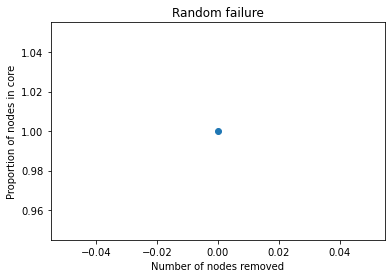

In [45]:
plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o')

In [46]:
nodes_sorted_by_degree = sorted(g.nodes, key=g.degree, reverse=True)
top_degree_nodes = nodes_sorted_by_degree[:m]
top_degree_nodes

[105,
 17,
 95,
 48,
 132,
 43,
 31,
 74,
 91,
 72,
 20,
 136,
 124,
 32,
 19,
 67,
 69,
 47,
 50,
 65,
 75,
 118,
 22,
 56,
 37,
 53,
 122,
 60,
 2,
 64,
 123,
 3,
 9,
 101,
 121,
 77,
 29,
 71,
 4,
 13,
 26,
 66,
 51,
 68,
 100,
 142,
 27,
 28,
 16,
 49,
 137,
 115,
 18,
 35,
 125,
 6,
 112,
 139,
 14,
 85,
 107,
 39,
 58,
 104,
 141,
 90,
 99,
 109,
 143,
 130,
 102,
 11,
 24,
 10,
 73,
 41,
 119,
 54,
 78,
 70,
 82,
 111,
 120,
 134,
 117,
 57,
 12,
 21,
 36,
 61,
 76,
 86,
 129,
 7,
 40,
 83,
 126,
 23,
 103,
 94,
 110,
 25,
 55,
 30,
 44,
 45,
 108,
 131,
 79,
 116,
 84,
 106,
 128,
 38,
 33,
 87,
 34,
 59,
 46,
 114,
 127,
 1,
 5,
 8,
 140,
 81,
 89,
 52,
 62,
 135,
 97,
 113,
 133,
 88,
 93,
 96,
 138,
 15,
 42,
 63,
 80,
 92,
 98]

In [47]:
N = g.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps
num_nodes_removed = range(0, N, M)
C = g.copy()
targeted_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    targeted_attack_core_proportions.append(core_proportion)
    if C.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        C.remove_nodes_from(nodes_to_remove)

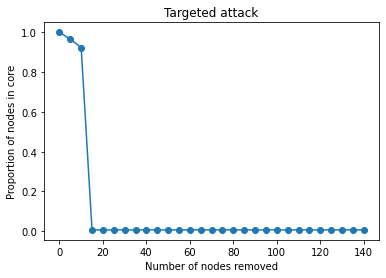

In [50]:
plt.title('Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='o')